In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import os
from skimage.io import imread
from skimage.transform import resize
from sklearn.metrics import roc_curve, roc_auc_score
import cv2

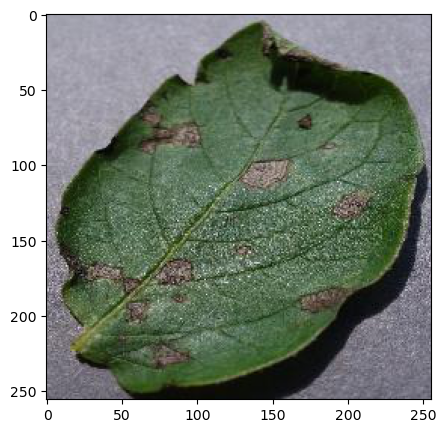

In [51]:
plt.figure(figsize = (10,5))
img1 = "/Users/garvsawhney/Downloads/PlantVillage(split)/val/Potato___Early_blight/0a47f32c-1724-4c8d-bfe4-986cedd3587b___RS_Early.B 8001.JPG"
plt.imshow(imread(img1))

In [52]:
img_path = "/Users/garvsawhney/Downloads/PlantVillage(split)/val/Potato___Early_blight/0a47f32c-1724-4c8d-bfe4-986cedd3587b___RS_Early.B 8001.JPG"

In [54]:
img = imread(img_path)
img

array([[[162, 162, 174],
        [158, 158, 170],
        [159, 159, 171],
        ...,
        [158, 157, 173],
        [152, 151, 167],
        [147, 146, 162]],

       [[161, 161, 173],
        [158, 158, 170],
        [159, 159, 171],
        ...,
        [157, 156, 172],
        [153, 152, 168],
        [149, 148, 164]],

       [[162, 162, 174],
        [161, 161, 173],
        [162, 162, 174],
        ...,
        [156, 155, 171],
        [154, 153, 169],
        [152, 151, 167]],

       ...,

       [[105, 102, 113],
        [100,  97, 108],
        [116, 113, 124],
        ...,
        [107, 105, 119],
        [108, 106, 120],
        [100,  98, 112]],

       [[ 97,  94, 105],
        [100,  97, 108],
        [ 97,  94, 105],
        ...,
        [102, 100, 114],
        [100,  98, 112],
        [ 85,  83,  97]],

       [[110, 107, 118],
        [119, 116, 127],
        [ 95,  92, 103],
        ...,
        [119, 117, 131],
        [125, 123, 137],
        [110, 108, 122]]

In [56]:
img.shape

(256, 256, 3)

In [58]:
img_resize = resize(img, (128,128))
img_resize.shape

(128, 128, 3)

In [59]:
img_resize

array([[[0.62630018, 0.62630018, 0.673359  ],
        [0.6344199 , 0.6344199 , 0.68147872],
        [0.6344199 , 0.6344199 , 0.68147872],
        ...,
        [0.62844274, 0.62452117, 0.68726627],
        [0.62253634, 0.61861477, 0.68135987],
        [0.59187036, 0.58794879, 0.65069389]],

       [[0.63760632, 0.63760632, 0.68466515],
        [0.64522537, 0.64522537, 0.6922842 ],
        [0.64522537, 0.64522537, 0.6922842 ],
        ...,
        [0.61311967, 0.6091981 , 0.6719432 ],
        [0.61306118, 0.60913961, 0.67188471],
        [0.60606848, 0.60214691, 0.66489201]],

       [[0.63153517, 0.63153517, 0.678594  ],
        [0.63921494, 0.63921494, 0.68627376],
        [0.63921494, 0.63921494, 0.68627376],
        ...,
        [0.61239747, 0.60847591, 0.671221  ],
        [0.62122081, 0.61729925, 0.68004434],
        [0.6329797 , 0.62905813, 0.69180323]],

       ...,

       [[0.47570961, 0.4639449 , 0.50708216],
        [0.47290592, 0.46114121, 0.50427846],
        [0.46971469, 0

In [60]:
flatten_img = img_resize.flatten()
flatten_img

array([0.62630018, 0.62630018, 0.673359  , ..., 0.41165458, 0.40381144,
       0.4587134 ])

In [61]:
flatten_img.shape

(49152,)

In [62]:
input_dir = "/Users/garvsawhney/Downloads/PlantVillage"
categories = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']
data = []
labels = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        print(img_path)
        img = imread(img_path)
        img = resize(img, (128,128))
        data.append(img.flatten())
        labels.append(category_idx)

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/acb84d77-5b1c-4beb-be27-99fee467bf1f___RS_Early.B 7577.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/bc7552e4-3901-41b8-8bef-727eeca4270e___RS_Early.B 7942.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/1994cd3e-4000-4c56-bede-d35a1eecc287___RS_Early.B 6867.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/d8a8d6e5-d82d-4f7c-aac5-183e85549d9b___RS_Early.B 7799.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/1b4304a9-88c2-4c09-bfea-830fa162a35a___RS_Early.B 7188.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/86a65e8c-c7cf-45f7-8619-422eb6f1a40d___RS_Early.B 7745.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/60096f66-1bf2-4d8d-8137-ac2358ab71d0___RS_Early.B 6978.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/7ba072ea-9bb3-4b5e-8fff-82758ff3f722___RS_Early.B 8262.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/9cd81447-0701-4969-86aa-5f20269923c5___RS_Early.B 8790.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/ec9a34ed-90de-417e-bf87-31e748c8c770___RS_Early.B 7968.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/0ddd62cd-a999-4d58-a8f1-506e1004a595___RS_Early.B 8041.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/5a152fa7-7645-42ea-9c59-13258febe52f___RS_Early.B 7175.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/e4b0f6ac-2b1e-4e10-8733-de421a01c390___RS_Early.B 8254.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/d9a1cd5f-e2f2-49f7-b5f1-22cf02eb5ba4___RS_Early.B 8891.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/757b3cbf-a694-4e76-939c-5a93d3c932ab___RS_Early.B 8169.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/36548ca6-33b3-4a74-9b2a-52eba7aee9a3___RS_Early.B 9205.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/d50dde4d-fe2f-4e8c-b336-69be71e34ce8___RS_Early.B 6905.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/403aa255-393c-43b4-8f68-f68efbf4f5df___RS_Early.B 8544.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/3db185d7-7c05-42f9-b508-7a3883e50660___RS_Early.B 7011.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/ad8c76f3-16b3-4d7f-a9e9-cbec8c398d34___RS_Early.B 6694.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/4eb1fee6-e288-4c32-841d-9fc1d1824508___RS_Early.B 8446.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/c5c57ff6-cff1-4be6-a2fd-324efc139881___RS_Early.B 7450.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/5755142f-0cba-45b7-a563-beb1bf6db374___RS_Early.B 8321.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/b472654c-a32f-4c8f-b424-da6e415febf9___RS_Early.B 8930.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/e0552fed-9af3-4fbd-80e8-09151a839cf9___RS_Early.B 7576.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/0267d4ca-522e-4ca0-b1a2-ce925e5b54a2___RS_Early.B 7020.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/51e028c1-7aec-46e9-a389-391bc38b46f3___RS_Early.B 8505.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/5caecfc6-8e1d-401b-8014-763dec01cb98___RS_Early.B 8063.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/3ebc2af4-fe74-4918-b46f-09ec268884ef___RS_Early.B 7856.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/95fba7f6-23a4-4c3c-a2b9-335c5b4c3810___RS_Early.B 7743.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/1c42eae7-29c8-42fd-b05a-9b8255790f6f___RS_Early.B 7719.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/dc34096f-8974-4a76-8d15-42ee86038015___RS_Early.B 6734.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/c5b121ff-fc3c-406a-8127-2a7e413a0903___RS_Early.B 9006.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/a29ed5b2-153c-4f0e-a633-f698c9ff51d2___RS_Early.B 8840.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/2cf993b6-98e7-4678-aea5-9177ea3b63bd___RS_Early.B 7692.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/8e8ec280-1469-4286-ac93-0d88f393d21c___RS_Early.B 7891.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/f8b57e69-5902-4253-8404-11811ecf13e8___RS_Early.B 6995.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/92757a8e-b68a-45b3-9d70-0281c8ea90ca___RS_Early.B 7199.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/caef0735-6517-4194-b124-5916815e4a71___RS_Early.B 7956.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/b6c68639-ad01-41f9-a10c-4233423ea2b0___RS_Early.B 8573.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/8c01f338-2648-4bcf-99cb-853978b39014___RS_Early.B 6742.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/08194ca3-f0b2-4aaa-8df8-5ec5ddc6696a___RS_Early.B 8151.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/b21bc878-7b63-481e-a6d1-7e972627210e___RS_Early.B 7656.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/4c7622da-663c-48df-8005-355fff221fe1___RS_Early.B 8432.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/0d987d4a-26bc-4f74-8a16-12f8969dfed8___RS_Early.B 7013.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/bb3d6df0-683e-4f04-afaf-277a36edad6c___RS_Early.B 9070.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/f6d8c094-970c-41c5-9f5d-3ded7c8f7b15___RS_Early.B 6846.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/e7b48816-19f7-4dc2-bf52-dfbb85e1f59a___RS_Early.B 7240.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/6fdee580-fa84-4ea7-b54a-048919765284___RS_Early.B 8187.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/cf38c261-5bae-4b5d-92b4-16c634557d2a___RS_Early.B 7169.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/66c5930d-2169-4ec1-9919-28088d5447f7___RS_Early.B 8822.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/0e0a1b51-f61c-4934-bc57-a820af1faacb___RS_Early.B 7147.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/edc5f476-dd30-4fab-a8a1-71faf6210420___RS_Early.B 7315.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/0c5b14d9-8b1c-4c39-bb23-1835b5760caa___RS_Early.B 7937.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/fcbf4e6c-ba09-40f5-97c2-063bb20844bc___RS_Early.B 6938.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/c419a9f0-5fb9-4db6-a229-5c08c36896fe___RS_Early.B 8585.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/8f6d9148-ae73-42cc-be78-baca869d1543___RS_Early.B 6805.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/b328c22c-c9c6-41fd-9bac-daf2f26143b1___RS_Early.B 6854.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/fa8656fd-03b1-467c-a877-99ce5632d580___RS_Early.B 7630.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/b8803558-9e0f-404e-80b3-c78d0bc7f6d0___RS_Early.B 7548.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/c74c801d-a6e5-44dc-a7e8-f3a5f39a300e___RS_Early.B 7864.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/0ede4acd-3685-40d9-b52b-7b3cb6536fa8___RS_Early.B 7377.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/a5e73fd4-6d3e-4037-b440-f4e5234e4459___RS_Early.B 7645.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/028f9b73-142f-499a-9c7b-d7c1ed5e5506___RS_Early.B 8546.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/dd9c3ad3-aa94-4d00-88c8-8e4618e8832e___RS_Early.B 7633.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/d0be9a48-d0f6-4d34-9c80-3eb7631e2d8d___RS_Early.B 8143.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/c71ad6f9-6258-4602-84dc-ecf75296672c___RS_Early.B 7525.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/b4021eae-d195-400a-b7b7-9888367f5f2f___RS_Early.B 7881.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/99821810-926a-4ac4-9bc7-cbae991f7e68___RS_Early.B 7626.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/467991cb-4b55-4b00-9b18-7ff5efdd7adf___RS_Early.B 7290.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/65b66b8f-2117-4876-85bd-23941349231f___RS_Early.B 7219.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/0ad3ba53-f01b-403b-a99d-5991eed85045___RS_Early.B 7600.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/65f6e2f1-300b-42f0-bcc8-467753411947___RS_Early.B 7591.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/4849de96-2e26-4c8d-8944-bd9e8edee5d8___RS_Early.B 9196.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/73d47ccd-4f15-4d93-90d1-5c35dbedd91e___RS_Early.B 7567.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/28f275f9-4dd9-479a-a005-ed442362840a___RS_Early.B 6790.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/cd025ad0-9486-4ee6-b545-c9040dc4e1c7___RS_Early.B 8821.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/ac40d7e9-e650-40f1-b894-22f495febefd___RS_Early.B 7276.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/da3115aa-a34b-42b2-97a9-9a1922770c8d___RS_Early.B 6708.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/e3779bc5-a8e2-4be6-8e15-4a4713ab9531___RS_Early.B 8431.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/900514b4-8768-4370-bc53-998e390644db___RS_Early.B 7788.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/e09798e4-23b1-4485-873b-605bc350f327___RS_Early.B 7320.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/9a157bfb-073a-46b2-95c6-16792e30e03f___RS_Early.B 7409.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/8d015dcf-e4da-41b7-9d81-8d160000accf___RS_Early.B 7264.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/b76550de-8e3a-46f1-b06f-6bd4ed3dc8a5___RS_Early.B 8456.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/49f13f57-6881-4caa-839b-d93215ce1b77___RS_Early.B 7009.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/4b925312-1973-41cf-afdf-9090d02dd539___RS_Early.B 7913.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/fe24f700-d37f-4e51-b07c-931e8c3ded81___RS_Early.B 8792.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/74bedc99-e24e-43de-a17c-003822c8af41___RS_Early.B 8725.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/8be5bc25-febc-4bde-bd2b-01a54d3c6e3c___RS_Early.B 8760.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/4699d1d8-f931-4b1c-8fd4-03a58350a86d___RS_Early.B 8972.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/89273b26-09d5-4bf7-a6a5-22c47a613b93___RS_Early.B 7383.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/686938d8-5fcc-4482-850f-0e8720206046___RS_Early.B 7769.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/77725a5a-c0b8-4b7c-bc42-ac99f51428c1___RS_Early.B 7401.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/73273541-2855-4516-92c3-658703bd2d18___RS_Early.B 6814.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/0d9dbf50-53a9-42b2-8b29-0360fb7dbd98___RS_Early.B 6692.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/cceeec9d-e0d9-4512-a1f0-faa5dc6bbf40___RS_Early.B 8381.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/84546db4-ea7c-4357-bf3d-6afcae9a05bf___RS_Early.B 7637.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/9d0c69df-f5dc-4118-a654-ab40d100b9b6___RS_Early.B 8870.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/37d94308-8783-4657-9ca6-eaca86e1015a___RS_Early.B 7825.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/d031102c-679d-4323-a5ee-4c52ed2d5740___RS_Early.B 6947.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/b1b55149-b5bc-460e-87af-a745fb01855d___RS_Early.B 7477.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/c28107c6-ea57-4044-bb6e-508d6d360cd7___RS_Early.B 7057.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/985f3b47-d5ee-45d4-a020-f43ca80fb59e___RS_Early.B 9211.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/ab808dff-e0fc-42d0-ad9a-c4cb7f69e59b___RS_Early.B 9210.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/719dcce1-73f0-42c8-9941-44eb2b237544___RS_Early.B 8059.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/57bb36be-b5bc-44e0-91e5-0b1b4d31bc82___RS_Early.B 7311.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/a3fe02f0-6d49-4e9a-ba9a-ac26e8b65ca9___RS_Early.B 7560.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/432f1b02-9493-4cf1-8ef7-a40f817e43ff___RS_Early.B 8497.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/b3d44557-f696-4fc9-b144-dec4f4ba9452___RS_Early.B 9110.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/9eb646d2-e908-43d1-8dd5-0d6b8dcb21eb___RS_Early.B 7569.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Early_blight/992a06a6-1aeb-4876-b33e-4267aa1a0c43___RS_Early.B 7618.JPG
/Users/garvsawhn

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/6a62fd77-1091-43ad-86a7-f42c56615e5f___RS_LB 4871.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/a343cad1-3b4d-4761-b222-d0bbc0f4bdc0___RS_LB 2569.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/c77d14df-faac-47e9-97e1-fc84a7aa6e74___RS_LB 4322.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/84e85005-c647-4381-8762-c487074c9571___RS_LB 5186.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/72b12e17-d76f-4254-a4af-3ed3c3859500___RS_LB 3334.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/dac19eb9-e4e3-4ca1-8183-268b839901c4___RS_LB 5208.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/d378a0c5-d275-44a4-9f00-f7f180270f4d___RS_LB 2781.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/6fc1834e-7909-4177-9480-6cd9f23109b4___RS_LB 4023.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/f

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/520c0e9a-1ba4-44fa-aa60-dcdf018a00b3___RS_LB 2850.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/1338edcb-9e0e-458c-845e-206b869f9199___RS_LB 3205.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/908546cd-34b8-4502-ab09-0c5bb7c1d87b___RS_LB 4912.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/82eb4f72-487c-4f4e-ace6-cc44a24978ec___RS_LB 2600.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/a221647c-0dda-468b-93f9-81f50b14ff81___RS_LB 3942.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/12d72127-7880-4481-b3c6-caff04116a86___RS_LB 2632.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/9933b288-b5fe-4cbf-a9fa-58ef769b6f7c___RS_LB 2540.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/fdc86644-2491-4ace-b7e3-190e1d68ebba___RS_LB 5129.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/a

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/489107b2-13f2-401b-b931-39ca7fd4be2b___RS_LB 2665.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/5c1c57f6-6aff-4bba-892e-43ff02311c3f___RS_LB 4046.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/5a2996c9-ed8f-4c8d-bab3-b68a833b7811___RS_LB 4786.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/93905331-a3b3-43dd-8596-d8f7e6b3e88f___RS_LB 3306.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/6f2f2f80-80f5-4f0b-86f6-a0d9b0fa4cbc___RS_LB 4034.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/bc53f0fd-df00-42c6-ad50-aef25d2c6f7a___RS_LB 2954.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/7260ba74-3187-4a62-8962-cbea92def2f2___RS_LB 4769.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/9f9623f9-e632-4342-b698-95a0521953f9___RS_LB 3068.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/d

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/d8580222-d6c2-4519-94f2-f59c2d613d8b___RS_LB 4158.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/326919e6-16b9-442b-ada3-e4c37b3ab8ef___RS_LB 3187.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/fc9b06c8-7c63-445d-9858-a5a0c7be719b___RS_LB 3273.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/71cbb155-74cd-42f9-97ac-abca4a10ad79___RS_LB 4456.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/d50d5ba8-c809-431c-8cc1-e297bc2706f7___RS_LB 4467.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/b9ad8d86-aadb-44b4-9bba-d6adb446afd7___RS_LB 5188.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/23ad201a-469e-4687-9321-7329bf747992___RS_LB 4990.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/f7936082-7315-477d-9710-529a7024b32d___RS_LB 2546.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/b

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/c6842cfb-6996-4a51-bc0a-7e2f89a903f0___RS_LB 3911.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/37ac120b-240a-42fc-839c-90c6dea13d85___RS_LB 5214.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/ac42817b-71f9-4336-ad8b-bdfb4b27a64a___RS_LB 4782.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/def9c9e1-fd12-44d9-92ae-18c5ff0f52da___RS_LB 2605.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/8c3c1c3f-5cf0-4daa-9267-243cf1b47927___RS_LB 5005.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/cf336796-9b96-4156-adc4-6fbeaebf2a6a___RS_LB 3207.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/ad628434-32ce-4365-90b0-f394d98fbe00___RS_LB 4905.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/bc5b403e-ecc2-4fde-bafa-9b8698e4545c___RS_LB 4448.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/5

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/a7dc8b54-5e4a-4055-ae98-eba4268cf966___RS_LB 5243.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/709bddcf-5c54-4fad-8a22-890c00e839a4___RS_LB 4732.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/9ccb00a6-1542-4b0e-bd90-e7f1ff10e7f7___RS_LB 3058.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/42bc0da9-199f-428f-854c-a9b05c57aa75___RS_LB 2770.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/4215b9d5-c554-4249-80e1-aeaf2106e966___RS_LB 2977.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/e48ffe4c-d920-4559-83ab-62d9d881d787___RS_LB 4129.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/0eb24a67-a174-43db-86c7-cca8795942a2___RS_LB 4722.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/ee09546f-d7cd-4af9-9445-41745638c9c3___RS_LB 4471.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/4

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/c66982eb-dd83-487a-98c6-2aefdf5d7be0___RS_LB 4683.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/dcf61d08-eda8-41c1-9293-43895d68b426___RS_LB 4372.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/ae5b08fa-25b7-4006-8b1b-2415356b3847___RS_LB 5453.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/2657bf2b-c03e-4ec6-bf6a-4afe8645acec___RS_LB 3110.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/0085ef03-aec3-431a-99a1-de286e10c0cf___RS_LB 2949.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/a9d4290d-55a1-4a8d-83a8-5277a00e5fbc___RS_LB 4076.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/1d4acd15-f2b9-4a2e-87da-9d5a2cc6a642___RS_LB 2752.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/8ee9f477-92a7-43a0-9377-0535b218a21d___RS_LB 5266.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/1

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/0396e413-e165-427a-ba72-04cbae7b8ab0___RS_LB 4751.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/51a85617-5433-4a07-b822-fa1975cf76b1___RS_LB 4778.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/1e3e04cc-3778-4d78-b8f9-d60faa0534b0___RS_LB 5246.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/716325d9-fca6-46b4-8f5a-f6729c211200___RS_LB 3958.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/613b5b7f-225d-4df8-8893-0f30111925ae___RS_LB 4243.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/38fa4c3b-0541-4d14-80e7-84a1153b9e5f___RS_LB 4713.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/9996efa6-219d-4f07-aa12-dc8ca40609b9___RS_LB 2840.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/2f6382f7-12fc-4309-b7db-b034b8165c67___RS_LB 4955.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/5

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/e1197d2d-980a-45b1-9ab1-5b7cc36660bc___RS_LB 3885.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/d992e6d3-25c9-4bbb-a806-8bc1455e5c40___RS_LB 4968.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/b64e4518-147a-4a75-9f9b-33db8902aa12___RS_LB 3202.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/37c1e3d4-e54b-431a-b370-2a506b6026a2___RS_LB 4461.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/09a30eff-d386-456d-a6ce-ead7c0d6235b___RS_LB 5068.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/377e9523-f375-4c0c-9d66-5abf2abfaefb___RS_LB 2504.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/10f41035-20e2-4037-96b6-474ce343d6c2___RS_LB 2725.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/1f440bb7-e35d-4bc9-a807-81dac78c54b8___RS_LB 2727.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/d

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/1ab62af3-c0a5-4fab-bb62-e06d6f7ddb59___RS_LB 2908.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/6033f0b2-48e7-411c-a39b-86297f412c19___RS_LB 4020.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/2717d9f6-68a9-44ca-b290-0311a5356621___RS_LB 4564.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/958a4438-2ced-4d8c-af73-871376cf6ed5___RS_LB 4483.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/0441138d-5f9f-4ede-ab9a-49edabc605b3___RS_LB 4235.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/8137ed93-0e40-4bcd-9da7-f69ad5a08cd5___RS_LB 3059.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/0f824e18-3821-486c-81a1-f1f64cf6e767___RS_LB 4894.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/b294595b-8950-4e5b-8dfc-2ad9ca2c5e0a___RS_LB 4475.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/0

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/72485a02-60b9-424a-ba1f-de8078b07176___RS_LB 3148.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/c58de13c-b59d-4497-ae5a-08b425919b64___RS_LB 3116.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/6a6315ef-b37d-4067-80cd-bb2d8adf93ca___RS_LB 2919.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/3c5e5bd4-e805-44b4-a030-51ee6bb1cef6___RS_LB 4139.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/dd08ad51-110b-4de0-bfbb-862e53a6165c___RS_LB 4542.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/c89d5a2a-2c1e-496e-84b8-b7a844a97ac9___RS_LB 4920.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/72e10017-f8a6-4813-8036-0cde4dad6057___RS_LB 4666.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/ff03a125-445b-40e1-a7ed-0bb9b155dfd8___RS_LB 5039.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/1

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/4043044d-1e8d-4861-9152-99660fdffa9e___RS_LB 4438.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/ae52f85f-bce0-4fb9-a109-009e099a72e6___RS_LB 4972.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/58334b81-9aab-4b5c-b655-f7078a81135b___RS_LB 3846.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/3e379b4f-29dd-4f14-86e6-11fa37cf3ae9___RS_LB 4789.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/85d60a7c-4a4c-4fcf-8743-21b4c03ff12c___RS_LB 3868.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/d20fef22-7016-4115-9930-a66b32c718c6___RS_LB 4417.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/07ff77ae-07b4-4a2d-9c4a-bb89bb4fb1ef___RS_LB 2985.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/b86630ca-89d0-4f83-9942-c1bfcce6b06c___RS_LB 4339.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/7

/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/3f7f719f-9849-47c5-8f79-0384a64f8e8f___RS_LB 2862.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/53e33b6d-9fc5-441b-b638-3bf067f92a99___RS_LB 2753.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/dd36e5d1-434f-41ce-8f7b-6528e9adc77d___RS_LB 4060.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/e986907b-6948-4c72-93d3-29cb795cc9a1___RS_LB 3837.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/1c207156-339d-4ec9-9153-9edb3bc95b5f___RS_LB 4833.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/b469e38c-ef99-4ed1-b294-1e65727138fb___RS_LB 4056.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/ef48ec23-0655-43d7-9475-8e73086033a2___RS_LB 5219.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/b74d0fd1-9af7-4053-8538-ee937236a64d___RS_LB 4918.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___Late_blight/9

/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/ef7005dc-1d44-412e-b858-145a2d7a6fa9___RS_HL 1951.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/907f26b7-a14f-463f-a41e-f35d6e0f1417___RS_HL 1757.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/30937333-8898-4634-8c00-af57d3020ba6___RS_HL 1922.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/1ae826e2-5148-47bd-a44c-711ec9cc9c75___RS_HL 1954.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/7bfda067-6e35-4af5-a9c4-4b3b5f357871___RS_HL 1813.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/bb328d40-e4e6-4b84-a92a-e7cb3922c19d___RS_HL 1829.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/54f86311-9d76-421b-b401-0b02f6e738a5___RS_HL 4172.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/0b3e5032-8ae8-49ac-8157-a1cac3df01dd___RS_HL 1817.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/3f369e63-81eb-4194-a145-df9ed91abc5d_

/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/aa04db6d-645f-4e8a-88dc-c9f9396f0800___RS_HL 1975.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/1106c3fc-92cb-41a6-a6c6-8f08b9b45108___RS_HL 1914.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/a5050bde-febc-4931-b31d-45c9652df318___RS_HL 5373.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/1b434c52-7be4-40c4-90d5-13220f1a3eba___RS_HL 5418.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/9a6eb7c4-6b43-477a-89e0-69f62ef67991___RS_HL 1846.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/b9ea902d-e557-4fa5-893b-39a7a57c0121___RS_HL 1893.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/6f4b9acd-f34d-4771-a6bc-2001de2dd1d3___RS_HL 1898.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/fd92bd9c-02cb-4599-8673-9316159504a1___RS_HL 1927.JPG
/Users/garvsawhney/Downloads/PlantVillage/Potato___healthy/3c0d6888-c7e1-4cf8-9c25-9a0b8c62ba72_

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/c2a64948-bda7-4a89-aec6-be714ba7cf99___RS_Erly.B 8330.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/023fe2d4-6e1d-40ce-99ae-85ba90f436ff___RS_Erly.B 6354.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/fc296f63-8cb3-42f1-a9c1-f6ed8e49777c___RS_Erly.B 6400.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/06339fe1-154f-4bcb-be91-a29e86e25929___RS_Erly.B 7440.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/0fbc786c-62a7-44f3-8db8-2649809bf1aa___RS_Erly.B 9514.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/c27f6ed4-7ae2-4187-8e96-edafd886f123___RS_Erly.B 7618.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/1ba9a636-a673-45bc-b515-4fe6848f271e___RS_Erly.B 9605.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/42ee69ea-4c2d-4e65-9c66-e3154dd08375___RS_Erly.B 8428.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/a20bd77c-4ecf-473c-89aa-329b1719fbe1___RS_Erly.B 7639.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/efe14014-c5b8-433b-a469-e10ca8d7c551___RS_Erly.B 7499.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/392df5d9-0383-4ce9-a6fa-17d09cdc3c62___RS_Erly.B 9497.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/eaf0d111-089a-4808-a34c-dd40e3bb4db4___RS_Erly.B 8393.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/f93578b3-4b98-4b13-95c3-495c656963f4___RS_Erly.B 8340.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/a87f4fa1-5d7b-42e9-81ed-127aa62ad1e6___RS_Erly.B 8258.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/4a063384-a4c0-4acc-a787-8236eb40a54e___RS_Erly.B 8281.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/68d40fcc-8554-4973-9abc-27fc1928cc9c___RS_Erly.B 7595.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/de57a88b-7170-4eca-93f6-330df50fa8b5___RS_Erly.B 9541.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/baea464c-e54b-4e22-8bbc-8047d19ed0cf___RS_Erly.B 8323.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/c73fd35a-bc55-46c3-baf3-a943a6e396c5___RS_Erly.B 9563.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/7a259d3d-cca4-4041-88ec-d3140cd96f25___RS_Erly.B 7415.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/3a7c19c6-a86d-4127-b00e-600cb0244ac4___RS_Erly.B 6415.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/2763c9bc-ecc6-4f1a-86a7-ef8ffa370420___RS_Erly.B 8422.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/72e0c27a-891e-4864-a473-c44d578ad2ed___RS_Erly.B 7622.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/c5b268b2-80e3-45b2-8ba8-2412df3d6444___RS_Erly.B 7364.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/acc5fb41-7b03-44c2-8167-47346b97791a___RS_Erly.B 8320.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/c410d512-4708-49dd-ba8f-efce2796a3f5___RS_Erly.B 7602.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/c87a666a-07bb-44cc-952a-33d69f075e14___RS_Erly.B 7631.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/603c6233-8cc0-4bb7-97f3-0e5db1614c63___RS_Erly.B 9398.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/d4a47a64-0c10-4a43-8712-4eee11c8cf1b___RS_Erly.B 9524.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/40b67c0a-5dd8-435c-80ed-764593d2147a___RS_Erly.B 7577.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/68f9f67d-e84a-4551-871c-7b56aab9defc___RS_Erly.B 7693.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/06d6d114-8d26-43eb-b79f-44218bbfa0d1___RS_Erly.B 9441.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/573fc55b-8a73-48ba-b916-5d7f397977e4___RS_Erly.B 8384.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/dc5fc62b-20c7-441b-bd70-aa24790302eb___RS_Erly.B 9510.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/65579d4a-eb54-47cb-a8f7-d886971c8c63___RS_Erly.B 7475.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/f8374b63-016a-4b76-9ca8-df348cb44564___RS_Erly.B 7688.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/3af16e88-1b4d-46d5-a099-7450600f11e8___RS_Erly.B 9545.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/79c34498-d83f-4afd-a339-074b4dbb20bd___RS_Erly.B 8450.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/da84925b-554a-465d-bdb2-91851f77d5ce___RS_Erly.B 9420.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/3b1caf5d-9b90-4adc-bde6-8a16af479f0a___RS_Erly.B 8270.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/11f247d4-f87a-4273-bb9a-317e17916a75___RS_Erly.B 9470.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/90915bb5-9440-43dd-85c1-5d30865054d5___RS_Erly.B 7493.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/ab1f0275-f2db-4dcf-befb-8921c6101b80___RS_Erly.B 7596.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/42c0d61f-b28e-43e9-9fa3-bb03c6ec086a___RS_Erly.B 9601.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/983a04ad-2cc6-4d78-9365-a67012b4ffdc___RS_Erly.B 7661.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/d204ed67-ae0c-40fa-84a4-0e7ef9bca62d___RS_Erly.B 8432.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/347120f8-e92d-43f7-9ace-196890cec04d___RS_Erly.B 9421.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/30c5bc48-7b5e-4bc0-9f0c-096042dacde2___RS_Erly.B 6333.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/77ac0ab9-bc81-4de6-8f4d-72d15974d227___RS_Erly.B 7773.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/f398656e-d695-4cea-89d8-13490de9264c___RS_Erly.B 7592.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/8b7b2dbe-cb3d-4ab1-a487-7c7d5553b796___RS_Erly.B 7448.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/73cf82cf-a099-4243-a7a6-b06c79eedb65___RS_Erly.B 7412.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/2ef629c7-3366-41b5-a1b7-0e3bcb3ac28c___RS_Erly.B 9395.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/beeaf08d-f961-4bd9-8612-a162500a83f6___RS_Erly.B 9407.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/9eec6625-b337-403b-b93c-e809f4e0b8c4___RS_Erly.B 7681.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/5e10503d-8b4e-4215-9128-b92b48fce53d___RS_Erly.B 7559.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/7a255c73-1a41-47f8-8705-dee13a9a5827___RS_Erly.B 9399.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/d354267e-4855-4197-a18a-668d706db705___RS_Erly.B 7405.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/d8bfc53d-7b22-48a7-a884-c808927dc149___RS_Erly.B 6349.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/eea79799-a869-4a1f-bfa2-5c85a27716ae___RS_Erly.B 8391.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/422802e1-cee5-43b7-b735-7f90b5e5d4e2___RS_Erly.B 7349.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/397ffe67-e784-44d5-ae1a-d1e2990c041b___RS_Erly.B 7637.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/caf4e799-6574-4eb6-81df-edd5d256fd45___RS_Erly.B 7536.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/5d0f4647-6f88-4c84-bacf-d6bc4d469c4d___RS_Erly.B 8411.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/e3e8305e-a7f1-4ac2-9ed0-7a09660b2fa3___RS_Erly.B 9447.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/54d55df4-c760-4191-b998-d1e1493a35f5___RS_Erly.B 7524.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/dc6eeebe-ebc4-406c-b5df-f4861f491db8___RS_Erly.B 9615.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/4ec7e2e9-7fc3-46de-a42d-eec0cbcc990e___RS_Erly.B 7532.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/a3af61fe-3cde-4083-963f-909bfced23db___RS_Erly.B 7590.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/c66ca8bd-a004-4efb-a66c-3be5168aaaca___RS_Erly.B 7826.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/f882f8cc-49bc-49f6-a6c0-fbffe60d81a0___RS_Erly.B 7672.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/5bcb328c-9fa4-4abf-a3b6-8a015ada7d94___RS_Erly.B 7476.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/7763d482-8290-46f4-83aa-edb87ae15297___RS_Erly.B 7766.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/6376d980-2b10-4990-a58d-ca0e7dfc6af3___RS_Erly.B 8215.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/801083ae-26f9-4a9a-9e9a-f73fb18b67e5___RS_Erly.B 7363.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/8a089fe7-9e6a-4db7-b0e8-9792e4abc326___RS_Erly.B 7466.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/c29f66a1-5df9-4bd7-a6cd-89a0d4a4cba5___RS_Erly.B 9608.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/680b86dc-14e0-4668-95c8-776193015146___RS_Erly.B 7854.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/a6abb0cb-af59-4136-a928-f08d5313ae36___RS_Erly.B 7561.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/2fa6cd46-eb76-481e-b15a-44c858f705b3___RS_Erly.B 9532.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/77b824b4-8d93-44cf-8e8d-b6433fea90b7___RS_Erly.B 6459.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/49c8f57f-3418-45db-b807-6192c20dfc6a___RS_Erly.B 7784.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/467b230b-ca0c-4f44-bf22-3e6e0454d51a___RS_Erly.B 9429.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/3726eff6-547d-411e-bc00-f8b533d067e3___RS_Erly.B 6494.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/a28eb895-ef7c-49cc-bc0f-5e01498e5ca2___RS_Erly.B 6463.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/d418610e-e676-4722-b84a-6de973499fa9___RS_Erly.B 9425.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/8485290f-ef3b-4011-8ff1-02060013a722___RS_Erly.B 7703.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/aea263ac-87a1-42b7-a3ca-15d69e55204e___RS_Erly.B 9486.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/809042e0-7587-4a45-93e8-e166c07a55ec___RS_Erly.B 7692.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/eb94014e-83b7-46a4-9b1a-7cae23876302___RS_Erly.B 7471.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/90b9c783-480b-4f9b-a97a-d632f60a8f24___RS_Erly.B 9566.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/10e7dcfd-2cbc-4623-ba9f-94f0e2e4fe13___RS_Erly.B 7648.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/71ec70cc-dfa7-4798-8970-80edfa6435f2___RS_Erly.B 7484.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/389a93c4-2ea1-4df5-94c6-01ea8ad856db___RS_Erly.B 7720.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/546af1f7-3d4f-4024-88b1-f981fea7f2dd___RS_Erly.B 9455.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/be03b7aa-4c59-4ea9-b3cc-33a93a34b402___RS_Erly.B 7742.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/6cd7bfa5-f336-4227-b8cf-3461dedc3b43___RS_Erly.B 7346.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/7ecb4521-70ac-4f49-ab74-2678cc4eab2a___RS_Erly.B 7690.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/801a593c-82f7-4433-8c30-9defa319bdb7___RS_Erly.B 9609.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/9498ce3a-8dc1-43ec-aeec-a05825cf9af2___RS_Erly.B 7820.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/1941f5d9-f31f-453e-b07c-3f90da6aa381___RS_Erly.B 8238.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/ed68595a-4d05-413c-a173-fa32cc8aae38___RS_Erly.B 7635.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/0e2abcfb-e62b-4c61-a24a-0800cad904a8___RS_Erly.B 7382.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/4d80e993-6d3e-4537-92ba-39834a88e50c___RS_Erly.B 7632.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/3d9cca85-96cf-4186-b863-933bbbbc8075___GHLB2 Leaf 117.4.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/aa2b76f2-a7e8-443c-81eb-20c00c0fd488___GHLB_PS Leaf 39.1 Day 16.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/72e49321-5eeb-4669-9641-0e9146da9159___RS_Late.B 5102.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/ed06f115-9ca4-44d7-be94-e514a5ca58ce___GHLB2 Leaf 148.3.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/0ead4ae7-b14a-4f00-862b-f8ca126136ec___GHLB2 Leaf 89.2.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/c6cfdcc7-c5e6-45bc-8b5a-709bf2753902___RS_Late.B 7081.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/6bd357a5-df74-4a18-a0d5-a078aeca7377___RS_Late.B 5134.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/732a9df6-b5dd-493b-a7dc-3f3cd034e3c7___GHLB2 Leaf 8762.JPG
/Users/garvsawhney/Downloads/Pla

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/f21ce358-48ea-4676-9395-22145c4c9707___GHLB_PS Leaf 25.1 Day 9.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/9c27b4ce-ee62-4251-b5c8-93b499d73811___RS_Late.B 6723.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/55dd5de4-3ebb-44f9-9656-60c8ecc04f52___RS_Late.B 6462.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/9c2ddeef-9d65-4b77-9b1d-3031d49791db___RS_Late.B 5309.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/91cb766d-bbfe-405b-8211-8dbfb6888c12___GHLB2 Leaf 8963.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/0f67214c-eede-4292-b731-30ef1c47b7b6___RS_Late.B 4902.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/fcaf83f1-ddaa-4faf-a4aa-f657f5342474___RS_Late.B 6278.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/3956f2c5-b3a4-49a4-8612-c7003d62698b___RS_Late.B 6287.JPG
/Users/garvsawhney/Downloads/PlantVill

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/caf4164d-4f6f-4a75-b394-924f89e0d040___GHLB2 Leaf 8759.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/25bb0739-cbd4-4e75-a6f4-67ca5cc7f986___GHLB2 Leaf 8789.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/851d91ae-4a1f-448e-afdc-09a961345353___RS_Late.B 5466.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/06b911b8-1375-4da1-929c-2294c4051ece___GHLB2 Leaf 8883.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/2fb21107-3a44-45fa-91da-07355b622e14___RS_Late.B 5307.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/81baeedf-b56b-49b4-a7ff-131083f12ba1___GHLB2 Leaf 8710.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/a38d671f-4582-4ee9-b994-63f2343821e8___GHLB2 Leaf 8592.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/6fcf86a2-e2fd-4a55-bdd4-216d58497f55___RS_Late.B 5064.JPG
/Users/garvsawhney/Downloads/PlantVillage/T

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/d6ccb948-fdd5-4357-bb6a-c3df838ea465___GHLB_PS Leaf 8.1 Day 8.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/16e4a1f9-21c2-4c1a-bdbc-1336da74ba2c___GHLB2 Leaf 145.3.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/a3deb552-d098-4b15-992a-d6f2fc49ae4c___GHLB2 Leaf 109.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/d0d54368-8903-496b-9b2c-705a3d4cf8d6___RS_Late.B 5377.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/659fd21c-cac6-4126-972d-f6f7b28f25e2___GHLB2 Leaf 9068.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/246cb5c4-d52f-4ba4-a77c-915f5a5c7d2b___GHLB2 Leaf 85.2.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/2b37aa48-ff2a-461d-97db-bf92628edde1___RS_Late.B 7086.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/54924dfc-c51a-426d-8f0e-d282fa7e8fd4___RS_Late.B 6481.JPG
/Users/garvsawhney/Downloads/Plant

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/32482915-ead6-4e0e-8b3e-a14dd3546b0f___GHLB2 Leaf 8595.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/40de149e-4734-4d63-a34a-7ab34ace1ae5___RS_Late.B 6126.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/8b37de5f-4c98-4880-b1a8-a921178959a9___RS_Late.B 6248.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/a41982b4-98ca-40de-a386-96e865a3dd21___RS_Late.B 6138.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/7fc96574-d320-4622-9695-1478156c6b76___GHLB2 Leaf 164.2.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/0dc24e61-c636-49e4-9a3d-3aa9a0efb429___GHLB2ES Leaf 69.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/745086e9-2e07-48e3-809e-7448e14332ef___GHLB2 Leaf 134.2.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/f482cb70-826d-462b-8dc9-d5d173df65cd___GHLB2 Leaf 8562.JPG
/Users/garvsawhney/Downloads/PlantVillage

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/f4c2eabd-d29b-44ac-bda7-46d4b07fe799___RS_Late.B 4852.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/10bdda57-bfe5-4403-a4c6-a1211d4f348e___GHLB_PS Leaf 20 Day 8.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/b2f89c9a-820c-4a8b-a6dd-bb0adab42757___GHLB_PS Leaf 44.1 Day 18.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/a67418bb-f556-4b1d-ac63-839c4ea89b43___RS_Late.B 6914.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/7ee00267-be66-4b6a-a207-0bf0046d28b6___RS_Late.B 6909.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/c614e6d5-04cc-4846-9867-84c83961c5cf___GHLB2 Leaf 8617.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/541b1d99-c630-4730-861f-a8ef53615709___GHLB2 Leaf 8857.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/87815762-3104-4c15-96c5-238ecda66998___GHLB2 Leaf 124.2.JPG
/Users/garvsawhney/Download

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/06a7cfd9-0992-4020-8a11-79249d657c0c___GHLB2 Leaf 131.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/73b30d1f-aa0b-47b0-8a4b-ee856be55431___GHLB2 Leaf 8672.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/abc618dc-e185-4866-a09c-6073404cac76___GHLB2 Leaf 153.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/45fefdc6-a9a7-4955-8066-146efe1c8a1c___GHLB_PS Leaf 27 Day 9.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/15dc06c9-506a-470b-a015-14dcb585389f___GHLB_PS Leaf 15 Day 8.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/cc182d88-d09a-4caa-948a-91db3007290a___GHLB_PS Leaf 2.1 Day 7.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/e82e3fd9-cc3c-4196-9bef-178576b882de___RS_Late.B 6316.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/9029b453-c7c1-4c80-9033-72b650866290___GHLB2 Leaf 160.1.JPG
/Users/garvsawhney/Do

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/046c65f2-b155-4018-b161-825191c5faaa___RS_Late.B 5042.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/6b7f4762-88d6-4e85-8fad-57ca4083ec89___GHLB_PS Leaf 8.1 Day 9.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/1f38a263-cfb5-47fe-8c0e-f8d62141f922___GHLB_PS leaf 28 Day 12 .jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/10acd4c3-b1b8-4fc7-848a-c9af30086e78___GHLB_PS Leaf 28.2 Day 13.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/442f2aa6-9341-4f25-b789-edb5c9ac078b___GHLB2 Leaf 8846.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/098f19fb-1064-4c96-9498-70adcd29f5ae___GHLB2 Leaf 8973.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/7e5386fc-de1d-4507-acb6-e0d0da3a35da___RS_Late.B 4900.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/f0ac2b25-fb74-43f7-9ca6-52bb05dd2ec2___RS_Late.B 6545.JPG
/Users/garvsawhney/

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/63385691-5de8-4652-abe5-15727fdcab4b___RS_Late.B 5342.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/ceec7525-b67e-43fc-8967-77d57133afba___RS_Late.B 5586.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/dbb9fbf0-e196-4730-ac80-859b7dd74188___RS_Late.B 5498.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/a5a9303d-5e02-4fcb-89be-86c5466d8a04___RS_Late.B 6084.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/2830b7f1-f265-482b-b0bf-ed5b49d71c99___GHLB2 Leaf 8992.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/f8176522-163b-48ee-a1a2-ea94c782b4ad___RS_Late.B 6137.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/d8856c76-c822-408c-9113-e1eadedb5cba___RS_Late.B 5491.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/e5d815b6-dd10-41a3-83e7-c25b6fd5d0c2___GHLB2 Leaf 9015.JPG
/Users/garvsawhney/Downloads/PlantVillage/Toma

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/5114b264-0305-4447-b560-6ca1826d3420___GHLB_PS Leaf 24.1 Day 16.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/081d1e25-3f06-46a1-95ef-d10a62faa80f___GHLB2 Leaf 8600.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/9b4df340-b1bf-4294-a275-1bc0d9b64ff6___GHLB2ES Leaf 138.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/01a68044-9c5b-4658-a944-6108c6862ce7___GHLB Leaf 2.1 Day 16.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/532b555e-ffd6-4864-abab-50cace76653d___GHLB2 Leaf 164.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/ff03c1b7-ae44-4b97-b0c8-ec2c6ca7f4e5___GHLB2ES Leaf 63.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/d966df9d-0762-4353-8b70-72c9b390013e___RS_Late.B 5591.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/1546f916-115c-42dc-90c7-ff8d53c4273f___RS_Late.B 4836.JPG
/Users/garvsawhney/Dow

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/1430346f-f3f2-4766-bd0e-c6f9316851e9___RS_Late.B 6311.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/44902d94-0273-4f60-ae20-d0ea4b202452___RS_Late.B 5587.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/319d4c9a-92d4-41ff-b351-f3d439233c9e___RS_Late.B 6357.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/ed1a1e55-f2b9-46d3-ab88-8742f569e831___GHLB2 Leaf 8758.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/08816f81-65f4-4372-84e8-d27b67a193d5___GHLB2 Leaf 152.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/13533985-e30d-4023-8bd3-7a45b07816ca___RS_Late.B 5593.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/fcc13483-8986-4424-87cf-c0afc86576a4___RS_Late.B 5565.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/a78725bd-f2c9-405e-8591-c8b009f43ea7___RS_Late.B 4918.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomat

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/fee09bd4-a9e3-4174-bd89-4f9b6f911902___GHLB2 Leaf 123.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/a5fe1111-38b0-4206-9ac7-3eec701beb79___GHLB2 Leaf 8868.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/fbbe43eb-7d70-4053-97ac-908fb9af1a6f___RS_Late.B 6587.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/7e92fb02-314e-4cad-a30d-e478b216bce4___RS_Late.B 6890.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/0a3f65fc-ef1c-4aed-b235-46bae4e5c0e7___GHLB2 Leaf 9065.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/cf21ccf7-0ad0-44cb-b541-a03d3921afcf___GHLB2 Leaf 8798.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/c9f19d2a-8c9d-4ac1-b077-545c5d6f53a9___GHLB_PS Leaf 53 Day 18 .jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/fc77b008-6f35-40c7-96d4-64660bb624dc___GHLB2 Leaf 8812.JPG
/Users/garvsawhney/Downloads/PlantV

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/62aff181-7479-4134-bb2e-9acbbf062a3b___RS_Late.B 6449.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/7525f169-671f-4ec6-95f2-5bb54b6fd14d___GHLB Leaf 2.4 Day 13.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/0a6203b9-ced0-4934-ae23-4a7d2e2e2fdd___RS_Late.B 6424.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/d2892ccc-cc57-49ff-88eb-5aa2ee0f862e___GHLB2 Leaf 74.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/9751ae34-d376-465d-9fce-ddb75caf98d2___GHLB2 Leaf 8781.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/0cdd34fe-e8f2-41a7-b634-475338233f87___GHLB2 Leaf 8801.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/dfc45d56-7ecb-46a5-b9da-9297df393f7b___RS_Late.B 6928.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/231e8502-72a3-4717-9ab7-919d02f6be1b___GHLB_PS Leaf 27.4 Day 13.jpg
/Users/garvsawhney/Downloads/Pl

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/dadc7e0f-8caf-4db0-9a05-f4b724c73bc2___GHLB2 Leaf 8685.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/cebd5337-bb61-4454-93da-bba4169f0802___GHLB2 Leaf 145.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/df7775b2-73f3-4708-86d5-a56e2bbb3337___RS_Late.B 5378.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/d7b354a6-7044-408d-85ee-b34576e901a4___RS_Late.B 4872.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/a4008f85-d333-4ca8-87c2-e8c9c68ed19a___RS_Late.B 6461.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/1e095cdc-6a71-4ae4-9709-be97b5668454___GHLB2 Leaf 8845.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/117a7f38-eaa6-4f88-b892-33e2a66d77d5___RS_Late.B 5129.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/ecb763a0-f905-48f2-a142-afa120068c82___GHLB2ES Leaf 119.2.JPG
/Users/garvsawhney/Downloads/PlantVillage/

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/0c3153b2-0e64-41b6-902a-66eafbf7cae6___GHLB Leaf 4.1 Day 1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/008ebb44-eb77-4843-b621-4b88b5df7d43___RS_Late.B 5188.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/69a7bc98-0c0d-4391-ad2f-2fa91a5d51ac___RS_Late.B 6986.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/e7619088-871f-422e-a6e8-5c8a7da70b3e___GHLB2 Leaf 8825.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/81b4d72b-4124-45d4-b96a-0ec13ca7f376___GHLB2 Leaf 8989.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/fbd28294-04c7-4f8a-8576-f523856c46d9___RS_Late.B 6640.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/75774583-0a9d-4eb0-8c31-9fe3ef6703f5___RS_Late.B 5569.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/91f4f56a-b0c8-469f-88a7-47908efa5842___RS_Late.B 5437.JPG
/Users/garvsawhney/Downloads/PlantVillage

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/0524e8c4-56d9-41e2-b22d-33f22950ff93___RS_Late.B 5320.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/c02d8671-0b42-4fb3-a7c7-5bbb002ca6d3___GHLB2 Leaf 8935.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/f2dd9615-908e-4504-b38d-542765ae4f48___GHLB Leaf 8.3 Day 13.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/be9f181f-5692-4811-9678-69dbe94d6ecc___RS_Late.B 4838.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/fce57140-eb13-4c01-8a18-88dc5e8a75dc___RS_Late.B 4923.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/af0ded43-0d73-4d40-bd97-2597806aa707___GHLB_PS Leaf 37 Day 13.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/6f78a5ad-d4cf-4289-8369-29a69aa493b0___RS_Late.B 6129.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/8c428644-bfe0-4f8c-944a-a8de1f318602___GHLB2 Leaf 8705.JPG
/Users/garvsawhney/Downloads/Pla

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/4fc2334d-be0a-45f9-970d-be7a0f6a6c2a___RS_Late.B 6268.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/d029a830-f39c-4668-b413-45b69e2b3640___RS_Late.B 4841.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/badd718d-0a43-411b-889c-d46a01834dba___RS_Late.B 5547.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/8168a850-1360-49cf-8ecc-77730cc24ac5___RS_Late.B 4979.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/e114b022-a00f-4055-9ff0-ae67c6722607___RS_Late.B 5024.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/2ac8376a-3401-4572-af45-6984e6415996___GHLB2 Leaf 8787.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/c18f749d-9774-43f6-9c27-ff3d532f551a___RS_Late.B 7100.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/bff5e162-e242-484d-ac72-96c0da9a39f7___RS_Late.B 6284.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomat

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/cb56bd8e-f217-4537-9d35-a62d6b82f48f___GHLB2 Leaf 8769.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/d55910c3-3530-4bde-94a7-6748f5fadfb4___RS_Late.B 7161.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/d0811c38-0d61-4bd1-a9a3-49d990c0cfbc___GHLB2 Leaf 8931.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/2e493726-b22f-4e98-a2e2-418a4425cafb___GHLB2 Leaf 8911.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/116c7fc2-8443-40b7-a8c0-9619e3e46f08___GHLB2 Leaf 8797.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/f3e53136-750b-4394-96fe-0cd8c2f747bc___GHLB2 Leaf 8661.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/98d99dcc-6922-4b11-9b64-7e75440da1a8___RS_Late.B 5095.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/1e55a2c0-6618-4c42-93a6-cfc8a9d5ca77___GHLB2 Leaf 9039.JPG
/Users/garvsawhney/Downloads/PlantVillage/

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/89c134ee-41f7-46b7-b4dc-4229b3b3ca08___GHLB2 Leaf 8952.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/804affe6-213e-4bcc-8736-e5034a31e454___GHLB2 Leaf 8659.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/77793164-1671-42f7-83a2-f13074ec4892___GHLB Leaf 2 Day 6.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/10d91c8f-6d77-4c15-ad21-459688b52055___GHLB2 Leaf 154.4.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/5c5a2e9e-e460-403e-9d8a-f961b1f10935___RS_Late.B 5133.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/1ab30bde-88a4-4e29-855e-fa7a6ec1e226___RS_Late.B 5145.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/7a08fe4d-cb32-4a4e-861e-249e582fb8c8___GHLB2 Leaf 8820.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/7847d3dd-66e7-470f-ab6e-5273c3ee8924___RS_Late.B 4905.JPG
/Users/garvsawhney/Downloads/PlantVillag

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/e0cf0b07-8ee9-406e-a7fb-5410ba7c84b7___GHLB2 Leaf 8630.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/1c74783c-7863-4b1b-bf1a-6b3ef55b34b8___RS_Late.B 7094.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/9f7dcd60-e691-4c1e-830e-7495f7cc123d___RS_Late.B 6166.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/f8afeeda-7bed-422b-8535-67e221372eb7___RS_Late.B 5315.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/052ec825-37a3-4467-a5ea-2e0601c29fbd___RS_Late.B 6786.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/f66e2c13-dd22-4277-8c73-ff987bc19064___GHLB2 Leaf 9090.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/43eb2436-bdba-4f67-8f51-d92c8f040690___GHLB2ES Leaf 141.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/b4a271bd-619a-4735-8fd5-28124c4f4508___GHLB2 Leaf 8949.JPG
/Users/garvsawhney/Downloads/PlantVillage

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/dcbd45d3-2e47-49e3-a887-d2aca70cfa33___RS_Late.B 6818.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/a63289bd-bdf3-4092-a460-2fa5138379be___RS_Late.B 7049.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/3be006f1-7062-47da-a375-8fb7fedb77c0___RS_Late.B 6229.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/ce90a66b-6d07-4fc1-89bd-af0de0c5dee1___GHLB2 Leaf 108.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/70fa3718-7288-47cb-8e13-a16afbec4fe6___GHLB2 Leaf 127.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/ee0c6d7f-7728-406b-b715-67ba31384954___RS_Late.B 5293.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/81425428-d995-492c-80ba-c28564d8f317___RS_Late.B 6265.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/766771e1-8e8e-4ce4-9af6-b4ed91c9e80a___RS_Late.B 6881.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/47a38705-6d43-429c-b3f6-54c01f3b08e8___GHLB2 Leaf 8718.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/c5b2af5b-c27f-4ed3-83e5-e2bfe096f024___RS_Late.B 6918.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/8cb8fc56-d6b5-4032-b5f4-aebe52af18a3___GHLB2 Leaf 8945.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/7c8a16a8-97a1-4461-9f72-b36e6676fd99___RS_Late.B 4863.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/48246fa8-29ce-4ae2-abc3-586440295cf0___RS_Late.B 5459.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/41474732-acc4-4262-931e-9b719abfb8c3___RS_Late.B 7048.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/73c69b7e-604a-4014-a42d-ce4205b35c74___RS_Late.B 5131.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/f08ebd91-a148-4494-a45c-55ebc1bf1f60___GHLB2 Leaf 8942.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tom

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/c782c37e-851e-4601-ab5a-65f627a7a099___RS_Late.B 4911.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/91de14a9-7d76-4975-ad9a-d1f06c99f786___RS_Late.B 6144.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/ac205c4a-58c5-430f-8b4c-f853652df749___GHLB_PS Leaf 30 Day 13.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/736cd652-e63d-4b01-a3c6-6859bc095fb9___GHLB_PS Leaf 39 Day 16.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/a6c7381f-fcfb-484b-a2f5-a435b66f5ea2___GHLB2 Leaf 112.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/de8d11a4-24da-489d-9c88-0d7cf5344cdc___GHLB_PS Leaf 2.3 Day 16.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/8e06d830-df85-4b76-be46-c7814bedcd51___GHLB2 Leaf 8907.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/0b137624-885b-4d9b-b9e6-330c6681de4b___GHLB2 Leaf 8848.JPG
/Users/garvsawhney/Do

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/b7f7e1e7-f535-4428-8f00-74b8fecb3740___RS_Late.B 6779.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/0b3c7107-cef9-455e-8fa0-30039b9fc206___RS_Late.B 5038.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/5b4ca8b4-ed80-43c7-90ca-f9912d9fb7b6___RS_Late.B 5226.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/cbad7bd4-3406-415b-b82c-bf4f995e8eec___GHLB2 Leaf 115.2.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/b7f7a13f-b7c0-4923-aaba-c270ce583b66___RS_Late.B 6686.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/26fa9fb7-10fa-496c-9433-e4053ff456da___RS_Late.B 4867.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/7dbd4aab-b307-435c-90bb-7a358eba9814___RS_Late.B 6617.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/80310e71-b197-444f-a31f-5f2e431c68bb___GHLB2 Leaf 8897.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tom

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/d26fdac6-4355-4875-8c27-ebb1eaa50a8d___RS_Late.B 5119.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/bd5b09dc-ca07-455b-9ff4-e02a5c7e8a42___RS_Late.B 6202.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/5ce6294a-d163-48c0-b052-b7e11d10128b___GHLB2 Leaf 8633.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/def2ded7-c610-404f-909f-83325dc4c85e___RS_Late.B 6854.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/8553094b-3e19-4e4c-8ba1-49e98ff135e9___RS_Late.B 4869.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/09e2fe63-c535-4986-a697-ed275752dc75___GHLB2 Leaf 9030.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/78863d29-72bb-494d-8f05-c5648130283f___GHLB2 Leaf 9112.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/62ba6c10-2e36-48ed-9f8b-f26cd5884666___GHLB2 Leaf 8828.JPG
/Users/garvsawhney/Downloads/PlantVillage/To

/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/435f78a8-70a8-4df9-b227-c6230301a17e___RS_Late.B 6672.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/9309c2d7-07ea-4dfb-a79e-2e9128d38a75___GHLB2 Leaf 107.3.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/42bc64dd-b367-4cc0-b5df-689c1e86705d___RS_Late.B 4906.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/2ab0515e-1f93-4c3b-991a-6cf131661c22___GHLB2 Leaf 8629.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/3e5cf9cb-de15-4d9d-8eb8-3d47c0094f14___RS_Late.B 6208.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/90eb1ec4-efb0-426e-b84a-1ad097741da9___GHLB Leaf 23 Day 13.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/bbedca9b-8f66-4437-adb6-87f11edd8398___GHLB_PS Leaf 47.2 Day 18.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_Late_blight/df84e2a1-7517-4096-b555-67fe2b7a7156___GHLB2 Leaf 9003.JPG
/Users/garvsawhney/Downloads/

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/1f763a4e-3f17-44c1-be1b-a8752d2b93a1___RS_HL 9830.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/4758f78c-2d77-4f22-aee8-914c0745edcf___RS_HL 0434.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/41dc5ea4-076f-4539-8cbb-6d4e53371c50___RS_HL 0472.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/e6d12c88-7d13-4b26-ada8-c5b34ccc77a5___RS_HL 0435.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/5f67b4d4-4503-4149-950b-6cd08a20aaf8___RS_HL 9696.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/d2ce7896-6fa4-45e6-96c5-d162da0e3e1c___GH_HL Leaf 220.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/6d4285ef-e3f2-4cd3-a873-efdd989cf1cb___RS_HL 0182.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/4ce3098b-aad2-4e5b-8f3b-fd827cad2c0b___RS_HL 0026.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/c0c7cd05-de91-47b6-9702-823e34e7d332___RS_HL 0505.J

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/6d2b6ab9-dd43-446a-ae14-0fc3fb12b9ca___GH_HL Leaf 265.2.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/16f3a461-aafc-49e9-8973-39a52190985a___RS_HL 9803.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/ec57d9f8-7dcc-49e6-9ce7-af7d01eda4d1___RS_HL 9718.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/c8b14af0-f81f-474d-8fa9-aa3f5b05c618___RS_HL 0532.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/e110eaa3-3f80-477f-ad86-18b7e308b764___RS_HL 0349.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/e95c13d4-9ba6-452e-b53c-03007f575401___GH_HL Leaf 320.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/99736699-54e4-4c14-bcce-6c249444e156___RS_HL 0165.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/387dd4db-733b-4d6a-b87e-77ab2f2890a8___RS_HL 9866.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/c57d8785-87fa-4ac4-af26-048936a5dbf0___RS_HL 

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/087e3b12-a80b-435f-8973-a3b07888f8b4___RS_HL 9847.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/c9f92d4b-9d9c-4932-ba1b-bc290987c154___RS_HL 0350.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/d0d0643e-c7f1-4cf3-8399-cfd8a73d1af3___RS_HL 9650.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/9fb8872e-e963-4d2c-9b16-62757705ca3f___RS_HL 0130.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/8c4ce164-9f46-4426-aff9-137acdc42c19___RS_HL 0424.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/8328f7fb-5929-4920-921a-ae9a24db66c2___RS_HL 0597.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/d9a6af00-1c5a-4299-9bad-b922c8b5c33e___RS_HL 0546.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/bc339a85-6c4e-428a-a18e-9174acdcab1e___RS_HL 0513.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/9ee73ce8-ea9e-4a76-8b41-39500bdf3514___RS_HL 0110.JPG
/

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/f04f1e27-b6b0-43a6-b5c5-a4ec6d75ed3e___RS_HL 9737.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/902d49e5-febf-4970-b0fb-99a57e8e284b___GH_HL Leaf 179.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/247e79d6-1874-4ce4-a777-a03a4f94edbf___GH_HL Leaf 211.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/5faa74ba-8f46-4b2b-a7bf-3bc8d9458526___RS_HL 9741.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/591c89ff-a75f-4613-b06d-4f3fbf6c426c___GH_HL Leaf 435.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/ad8359a4-48b9-4469-a012-ed9b220de38e___GH_HL Leaf 285.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/0aacdad5-c9b9-4309-96e3-0797bbed1375___RS_HL 9836.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/cfd491d6-4af5-4728-8f0e-0d330a07174a___GH_HL Leaf 482.2.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/e969c25d-8cc4-4730-a65b-330cd

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/6d6f479a-d165-46b3-95d8-43c4778c23f9___GH_HL Leaf 205.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/c17bbdf8-c589-44bc-a805-6dec51568733___GH_HL Leaf 402.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/64518a58-5c06-4a14-9ab6-2c4f71456050___GH_HL Leaf 394.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/397c68cc-c2f8-4a52-8468-557c8181bc9e___GH_HL Leaf 247.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/338994aa-89ca-4fa5-80ea-9efc94093280___RS_HL 0194.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/c866865c-d239-48ff-9134-92df32fe972a___RS_HL 9791.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/a20a5c58-38e3-4fe3-8bdb-1ce02169a6a3___RS_HL 0512.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/522cba8a-8cf7-4d39-a73e-0602ab6fc71f___RS_HL 0288.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/739d1e6a-f835-4ff4-ab1c-33946def661a_

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/4c3bf302-573e-4240-9d67-60412ea836d0___RS_HL 0254.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/ab19440f-0642-4dd8-820f-2f67d5abee98___RS_HL 0172.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/5300bf32-485d-4978-9099-3175fb666da8___GH_HL Leaf 475.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/97f4f8ad-c220-43f4-b25e-a6ae315057f0___RS_HL 0078.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/85487c92-0a3d-4dd9-a8f9-6d7b7e1887e6___RS_HL 9789.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/6890c333-c7d2-4d50-8734-f70b61cef213___GH_HL Leaf 447.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/b427ec05-0b9a-45c6-8148-cbddad66e99d___GH_HL Leaf 516.3.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/5c23afc6-7236-4f07-adcd-61b1f69e3fb2___RS_HL 9801.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/0764cff7-f198-467a-9afd-d9f0c7bcf7c9___

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/6248b67a-a5ba-4313-9248-2dd343266da2___RS_HL 0485.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/870b4923-2db1-4e01-827b-fbea6ed404cb___RS_HL 0164.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/6550c4ca-9494-4de5-8909-d0cdab8f0892___RS_HL 0401.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/9b2a3f9a-f450-471d-928c-270126c8602a___RS_HL 9758.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/ad6857d9-7cf0-42ec-b61b-7b5208863831___RS_HL 0320.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/e6f3e3b6-8d73-4564-9e0b-771302aaa6ef___RS_HL 0626.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/876e3a03-14fb-4a13-888b-02b2d9fa8e86___RS_HL 0313.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/40dfa3e5-617d-46bb-9eab-eb2b114e5367___RS_HL 0079.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/0cfee8b1-5de4-4118-9e25-f9c37bb6f17e___GH_HL Leaf 252.J

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/37203047-d8ba-43f7-b31e-d496c41c569c___GH_HL Leaf 389.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/2e0a7517-332f-4799-a083-5d393172909a___RS_HL 0612.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/8d3c1a28-27a6-4376-9390-2372dadb7264___GH_HL Leaf 395.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/709ca1e9-9c0f-4ebb-a3c1-529675210010___GH_HL Leaf 310.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/065cd824-d515-49f6-a68a-c1b6dd313472___RS_HL 0139.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/593c58eb-71d4-4626-89d4-de6f59964aa8___RS_HL 0106.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/e53267d6-9a69-4e42-9ddc-8481a337b3e0___RS_HL 0073.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/6aed746b-e45b-40d6-addb-71bdd0456618___RS_HL 0638.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/68e18442-2f1d-458d-b1ef-865c7390622c___RS_H

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/166b90f5-3bba-4aea-9bc4-212efb57a504___RS_HL 0377.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/9f1704fc-28ae-4e27-a6f3-885811ea80e2___GH_HL Leaf 260.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/96bf0aea-6bf2-4ad8-8fa9-bbbc30be4967___RS_HL 0200.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/bcf2a4c7-5e73-4443-b39c-74fd6895afb5___GH_HL Leaf 248.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/466832f0-bff9-4766-a597-dc89880a7b4a___RS_HL 0111.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/0c3eaf2d-8203-441d-9248-1c64e00b5b8b___RS_HL 0018.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/688c6cc1-16b4-4f4a-9491-afba5c8a64b6___GH_HL Leaf 347.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/51e66b4b-c192-432f-bc52-d1c86a8da427___GH_HL Leaf 397.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/1f43d81a-6889-4613-a727-f92a75cf9861_

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/0864ab65-d40d-4902-8213-09df86cf049e___GH_HL Leaf 400.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/fd2fa9cc-2147-40ff-9e71-0056eb7884ed___GH_HL Leaf 285.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/b89c8996-9a04-45fe-a517-97e23227881c___GH_HL Leaf 430.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/4946ed4e-9003-485c-830f-1ef42bf78185___RS_HL 0191.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/8834fdc1-4946-4cfc-a569-80eabaeebe1d___RS_HL 0154.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/541d6033-1cc7-4c86-a37b-423bc08d25a7___RS_HL 9973.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/062c4b5a-59d7-4bc8-a1d0-abdeb6fc9c0e___RS_HL 0295.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/f44c5128-2575-4fda-82c7-9954ead65027___GH_HL Leaf 384.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/8edbb3bf-ae44-4870-9c39-cd33fd088a55___

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/6883c31a-78b4-406a-9605-b6b31e0932cc___RS_HL 0037.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/f81def4f-22a7-4036-bfab-51b245f4a2ab___RS_HL 0055.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/2ee6d2c6-a766-422c-a710-e89582d8155e___GH_HL Leaf 470.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/846276ae-4ccd-45ba-9a46-f913d04a9456___RS_HL 0012.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/ca9e9564-bf57-4e2e-837f-a847db99a316___GH_HL Leaf 401.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/95973ed9-f9a8-4c71-b232-432f61020fe3___GH_HL Leaf 412.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/3767f857-a7b6-4801-b56e-b62e642fc508___RS_HL 0425.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/0576ef4b-c843-4dfb-b148-c917f7d605b7___GH_HL Leaf 299.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/293dddf9-f5e5-42de-ab68-f1cad0f69a43___

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/83fa8d6f-4c08-46bf-b4cf-7a33d4fe0031___GH_HL Leaf 180.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/249797c6-648f-4df5-ab87-a0b82eb08801___GH_HL Leaf 495.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/bd18b0d8-3ee7-4c96-a2d4-cf8db766c047___GH_HL Leaf 498.2.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/2605218e-e8bf-43d8-8b00-52058e9f0f25___RS_HL 9893.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/7b93db88-7c70-444a-9096-1812426217f7___RS_HL 0167.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/32a852af-ca60-4235-806a-21940281ed8b___RS_HL 0625.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/07776423-f0af-455c-a7c1-36215c7e7097___RS_HL 0321.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/ea815fb4-7c6f-4088-94d0-59609294c65e___RS_HL 9785.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/461aa22a-be16-4dc8-9d60-45c38eabe504___RS

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/3a1c6737-c9ff-44dc-9014-954753732160___GH_HL Leaf 406.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/05598cc1-60b9-4436-a233-973c42eff2d6___GH_HL Leaf 503.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/82a343d3-1a57-4190-b0d7-8e8c88e832a7___GH_HL Leaf 306.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/3f1beda2-534d-4970-b33e-99c43c1ee930___GH_HL Leaf 219.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/2a859068-5042-4f74-82ac-29339c760cbb___GH_HL Leaf 436.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/8a4dc6f9-2f54-4bdd-957f-d9fb709e1b26___GH_HL Leaf 302.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/5853fc45-5ce0-4b2c-a36e-18eda75a97c6___RS_HL 9632.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/a2bbffab-17fd-4608-8994-28f7a62e3a4f___RS_HL 0251.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/eb1f4546-7ba3-4d36-82d2

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/2c741e7d-d03b-4903-8e42-1e43f5ad7286___RS_HL 0131.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/162db449-3361-40fa-a9bf-42bb63d43781___RS_HL 9647.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/0f9a114d-1df8-442c-90e7-d14d2f6efb23___RS_HL 9964.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/5393abd2-b4e2-4af2-94d4-c52c919fc157___RS_HL 0322.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/4629608b-5ac4-49d9-a8ff-ca1548fd4710___GH_HL Leaf 375.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/221b0575-215a-430d-a728-60020b7ad160___GH_HL Leaf 340.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/14c040c1-d57c-43b7-9cda-74dff9e6a552___RS_HL 0241.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/12f2989a-82c7-41d1-ae23-93a6e85bfd57___RS_HL 9798.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/0326b4b6-0f25-47af-bfd9-d8fec314a4f5___RS_HL 06

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/13e0d497-f5fc-4fb9-9e9a-cb77bc330730___RS_HL 0397.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/1c092a12-ed60-42c8-86b4-0427db78a5d3___RS_HL 0076.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/c4237d59-bfd9-476a-93c1-c0c3c3fef4ef___RS_HL 0068.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/0a0d6a11-ddd6-4dac-8469-d5f65af5afca___RS_HL 0555.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/7de93009-6180-4027-8779-76947cda3e2f___2700323949_95aa2eaa01_o.jpg
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/9dab9ebd-6fbf-4565-99c3-06138ca51050___RS_HL 0500.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/5b36f575-af3a-454c-b31f-2d4218fb5cca___GH_HL Leaf 487.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/bc0e8e3d-0cd4-4650-ac73-c099a0b75d4e___GH_HL Leaf 426.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/ec754608-21ce-40be-abd0-46a66425

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/3d0c2ad7-4fc4-48df-9ee0-11932921ddd0___RS_HL 0633.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/399440f9-8e5f-4be7-805c-53c10636a9b2___GH_HL Leaf 332.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/4255f30c-f233-4706-9334-bc3c0d09d63d___GH_HL Leaf 372.2.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/3e51f746-2ed2-4eb4-96e7-f6717ec068fd___RS_HL 0122.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/06704d9f-3bbc-40cd-a5eb-258ed55e172b___GH_HL Leaf 491.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/fd09836b-96be-498a-a720-e17a54522de7___RS_HL 9687.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/c1413079-dfb4-41c5-b129-bc5b6b419e0e___RS_HL 0133.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/0eb4ba9a-6626-4e46-b561-c226b495073d___RS_HL 9862.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/8a5ed87d-5122-4aaf-8e39-9a3433c5f76c___

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/6657a918-63fb-49d1-a74d-8ef6bbb66231___RS_HL 9816.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/d88b90c0-2850-425d-af82-7bfb0f6a9dd4___GH_HL Leaf 361.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/01c1da17-8d9f-4d69-8a1e-58d37453d3c3___RS_HL 9641.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/c2f44d15-cc56-44eb-afce-b53e919becb9___GH_HL Leaf 398.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/a5a6aa27-9a67-486e-853d-50ccdd1d8c21___RS_HL 0170.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/c273003c-f52b-4a40-92f5-c1b8e9da53b7___RS_HL 0372.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/264a08a7-74a4-4492-aff1-8a3ab8b35c46___GH_HL Leaf 314.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/4d82bf50-5e71-4597-8684-6db7300e0cd4___GH_HL Leaf 316.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/6ff7ee8e-bb69-4b7e-a15b-09c6d406ef92_

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/1ddf5950-e27f-4928-8f4e-33242953e306___RS_HL 0181.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/f48aed97-8db4-40a5-aa39-e2c3c70fe8be___GH_HL Leaf 524.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/16fd1407-644b-42f1-a40a-6cacd9bc0258___RS_HL 9705.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/8ee7fa28-296c-4cf0-970b-d2015b1b75e8___GH_HL Leaf 327.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/bf2e072b-f57b-48ce-b155-f255bebd85a2___GH_HL Leaf 317.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/973bc347-b335-4333-8536-82db4a41fa6c___RS_HL 0142.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/7beda862-3964-4839-9d08-b9b3fa27b028___RS_HL 9952.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/5ac6005e-d9b6-4847-bd28-e43038e02450___RS_HL 0489.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/d6e27864-a8c9-426f-9e46-283d0eb3a7d0___RS

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/1ebf9add-aa7f-4a84-adbf-67f700f918bc___GH_HL Leaf 437.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/b212b78d-286a-4eec-b5b2-194ce2511695___GH_HL Leaf 345.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/3f12b950-bfdc-4670-adad-b32588dde9a3___RS_HL 9666.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/4af1cf6d-1bae-4e58-9168-2f6105a6fe9a___RS_HL 0608.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/59b3cd39-7a2f-4dc0-a08b-4c88f893f338___RS_HL 9792.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/7919a8c4-0eb1-477f-8534-fc8841245cf7___RS_HL 0538.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/93228670-1f62-4e23-8993-a488ff7068c0___GH_HL Leaf 257.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/958b8eb8-7004-434a-ad02-e62ff64dded0___RS_HL 0276.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/e1571f83-5f00-4653-a176-2033f27405fa___

/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/42e607e9-916c-470c-a17d-ec5348a40ded___RS_HL 0373.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/9ed00c97-7867-4e6f-a274-f2bad77ecfaf___GH_HL Leaf 515.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/fb73cd43-aa32-4aba-978f-034c9c809c25___RS_HL 9749.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/3e204d0d-cfdb-41a2-a68b-c3168305d099___GH_HL Leaf 441.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/45167988-3f78-4309-8ce2-633d7521847f___GH_HL Leaf 432.1.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/fd27de23-27cd-4f09-a962-df0b26899b07___RS_HL 0039.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/977bcf65-3e68-4be3-bb8a-4a860a6fef9d___RS_HL 9986.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/3d59c273-6439-4c0d-b5ac-3738faca5d2a___RS_HL 0413.JPG
/Users/garvsawhney/Downloads/PlantVillage/Tomato_healthy/d9bb47b1-fa25-49fb-9b30-df7a7db48f8d_

In [73]:
data[2000]

array([0.76620066, 0.69169086, 0.71522027, ..., 0.79637832, 0.75324106,
       0.78461361])

In [74]:
labels[2000]

2

In [75]:
data = np.asarray(data)
labels = np.asarray(labels)

In [78]:
data.shape

(6652, 49152)

In [77]:
labels

array([0, 0, 0, ..., 5, 5, 5])

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, shuffle = True, stratify=labels)

In [81]:
from sklearn.svm import SVC
svm_model = SVC()

In [82]:
svm_model.fit(x_train, y_train)

SVC()

In [83]:
y_pred = svm_model.predict(x_test)


In [84]:
y_pred

array([1, 4, 5, ..., 3, 0, 1])

In [85]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)
score

0.8467317806160781

In [90]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(svm_model,data, labels, cv=5)
cross_val_score

KeyboardInterrupt: 

In [ ]:
Mean_Accuracy = cross_val_score.mean()
Mean_Accuracy

In [89]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       200
           1       0.78      0.83      0.80       200
           2       0.90      0.29      0.44        31
           3       0.76      0.68      0.72       200
           4       0.83      0.83      0.83       382
           5       0.95      0.97      0.96       318

    accuracy                           0.85      1331
   macro avg       0.85      0.76      0.78      1331
weighted avg       0.85      0.85      0.84      1331



In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
classifier = SVC()
parameters = [{'gamma':[0.01,0.001,0.0001], 'C':[1,10,100,1000]}]
grid_search = GridSearchCV(classifier,parameters)
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}])

In [93]:
best_estimator = grid_search.best_estimator_
best_estimator

SVC(C=100, gamma=0.001)

In [94]:
y_prediction = best_estimator.predict(x_test)
y_prediction

array([1, 4, 5, ..., 3, 0, 1])

In [95]:
newscore = accuracy_score(y_test,y_prediction)
newscore

0.8700225394440271

In [97]:
print(classification_report(y_test,y_prediction,target_names=['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']))

                       precision    recall  f1-score   support

Potato___Early_blight       0.88      0.95      0.91       200
 Potato___Late_blight       0.83      0.86      0.84       200
     Potato___healthy       0.73      0.35      0.48        31
  Tomato_Early_blight       0.82      0.71      0.76       200
   Tomato_Late_blight       0.84      0.87      0.85       382
       Tomato_healthy       0.97      0.97      0.97       318

             accuracy                           0.87      1331
            macro avg       0.84      0.79      0.80      1331
         weighted avg       0.87      0.87      0.87      1331



In [99]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prediction)

In [100]:
classes = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_healthy']

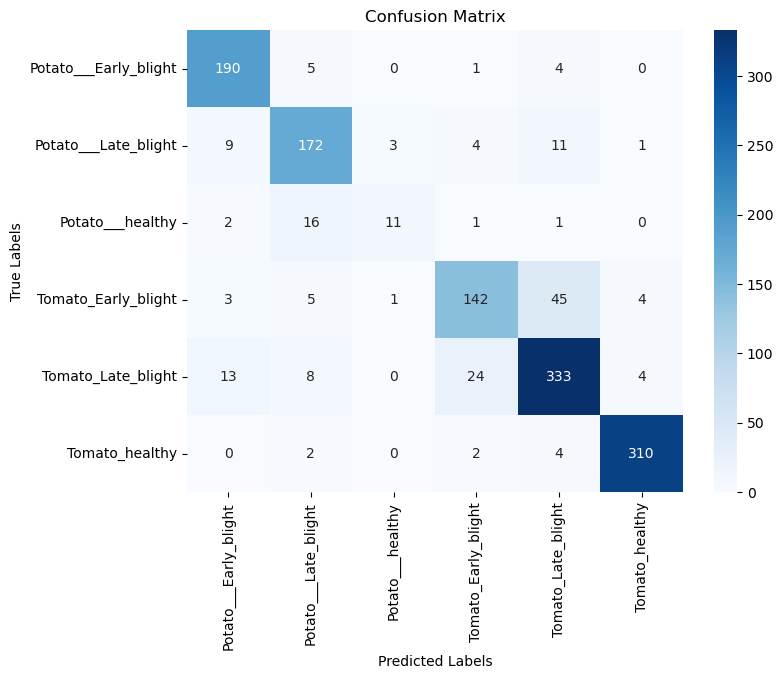

In [107]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [138]:
import pickle
with open('svm_model.pkl', 'wb') as f:
    pickle.dump(best_estimator, f)

In [139]:
with open('svm_model.pkl', 'rb') as f:
    svc = pickle.load(f)

In [116]:
dec = {0:'Potato___Early_blight', 1:'Potato___Late_blight', 2:'Potato___healthy', 3:'Tomato_Early_blight', 4:'Tomato_Late_blight', 5:'Tomato_healthy'}

(-0.5, 255.5, 255.5, -0.5)

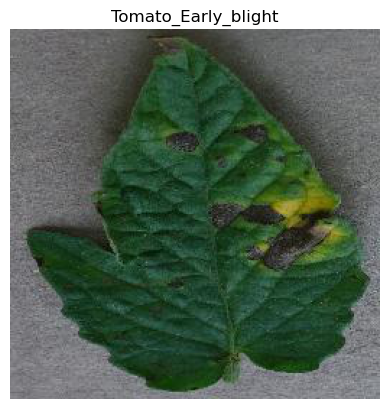

In [150]:
img = imread('/Users/garvsawhney/Downloads/PlantVillage/Tomato_Early_blight/10a46a0b-debe-49f9-8562-c7c81855160e___RS_Erly.B 6339.JPG')
img1 = resize(img, (128,128))
img_flatten = img1.flatten()
img_array = np.asarray(img_flatten)

p = svc.predict(img_array.reshape(1,-1))
plt.title(dec[p[0]])
plt.imshow(img)
plt.axis('off')